# (논문) Review
> 선행연구 리뷰

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김하영
- categories: [Study]

---

## ref

- https://arxiv.org/pdf/1805.08620.pdf
- https://www.robots.ox.ac.uk/~vgg/data/dtd/
- https://stackoverflow.com/questions/687261/converting-rgb-to-grayscale-intensity (rgb2gray)
- (연구) DTD samples 교수님 노트 코드

## import

In [4]:
#install.packages("png")

In [3]:
library(Rssa)
library(jpeg)
library(png)

## test data 1

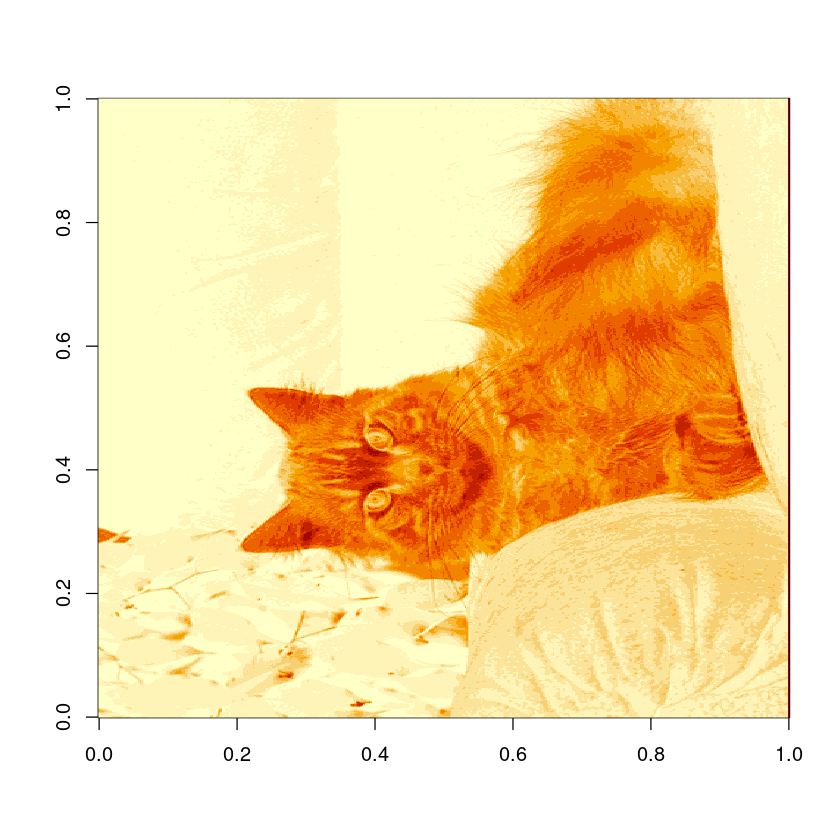

In [26]:
z=readPNG('original.png')
z= z[,,1]*0.2989 + z[,,2]*0.5870 +z[,,3]*0.1140 
image(z)

In [6]:
str(z)

 num [1:470, 1:623] 0.0907 0.091 0.1037 0.118 0.1213 ...


### SSA

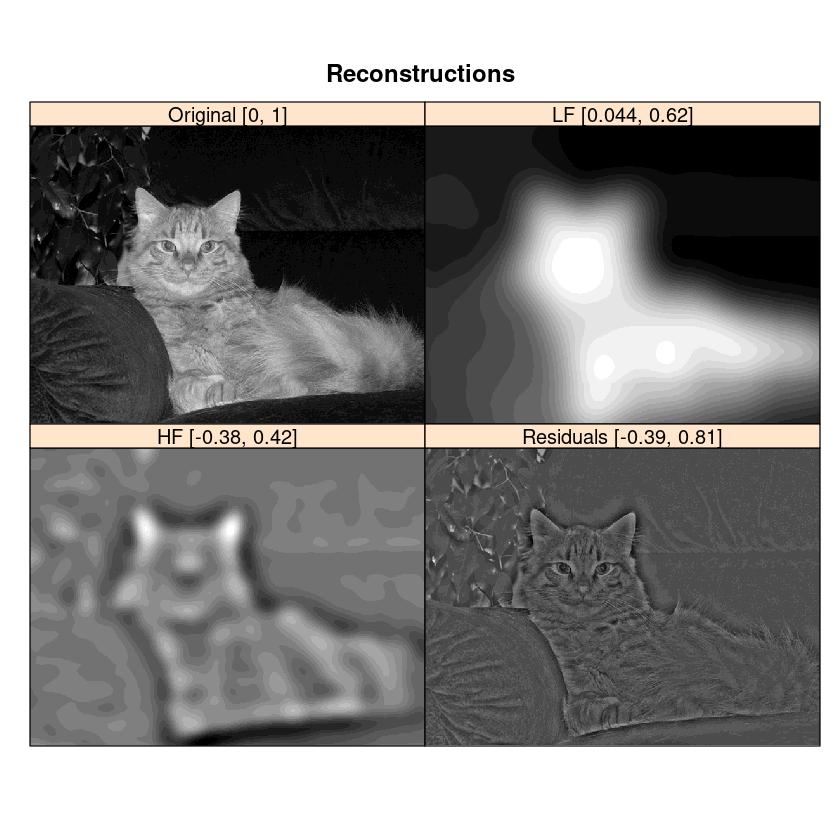

In [7]:
ssarslt<-ssa(z, kind="2d-ssa",L=c(64,64))
#plot(ssarslt,type="vectors")
decomprslt<-reconstruct(ssarslt,groups=list(LF=1,HF=2:10))
plot(decomprslt)

### 2D PCA

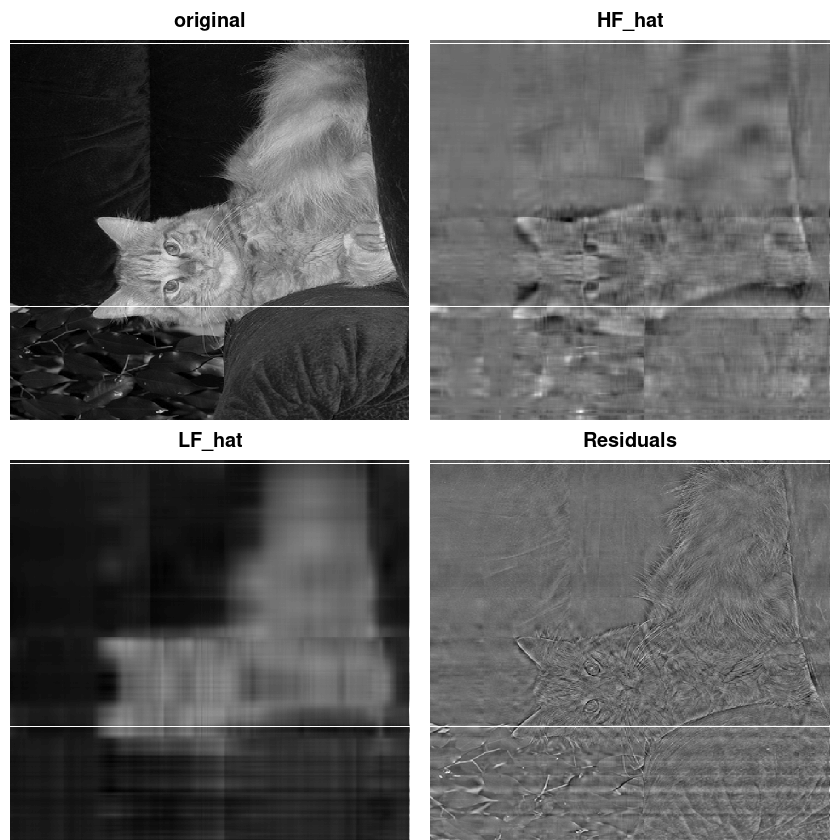

In [8]:
G=t(z-mean(z))%*%(z-mean(z))
outsvd<-svd(G)
#plot(outsvd$d[1:20]/sum(outsvd$d))
par(mfcol=c(2,2), mar=c(0,0.5,2,0.5))
image(z, xlab="", ylab="", col=gray(0:100/100), axes=F, main="original")
image(z %*% outsvd$u[,1:5] %*% t(outsvd$u[,1:5]),xlab="",ylab="", col=gray(0:100/100), axes=F, main="LF_hat")
image(z %*% outsvd$u[,6:20] %*% t(outsvd$u[,6:20]),xlab="",ylab="", col=gray(0:100/100), axes=F, main="HF_hat")
image(z - z %*% outsvd$u[,1:20] %*% t(outsvd$u[,1:20]),xlab="",ylab="", col=gray(0:100/100), axes=F, main="Residuals")

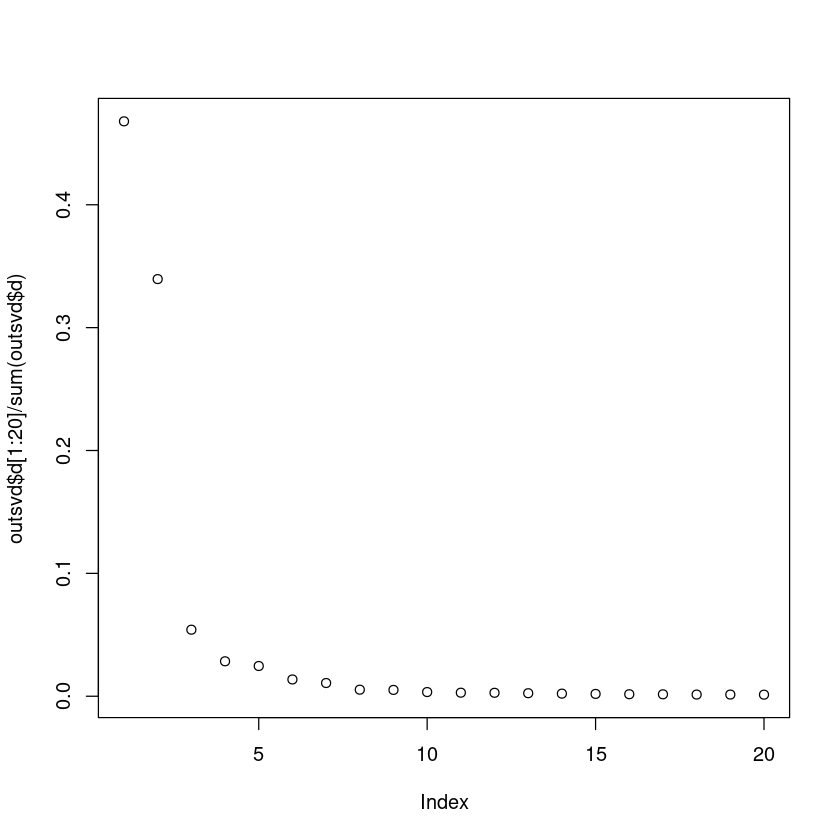

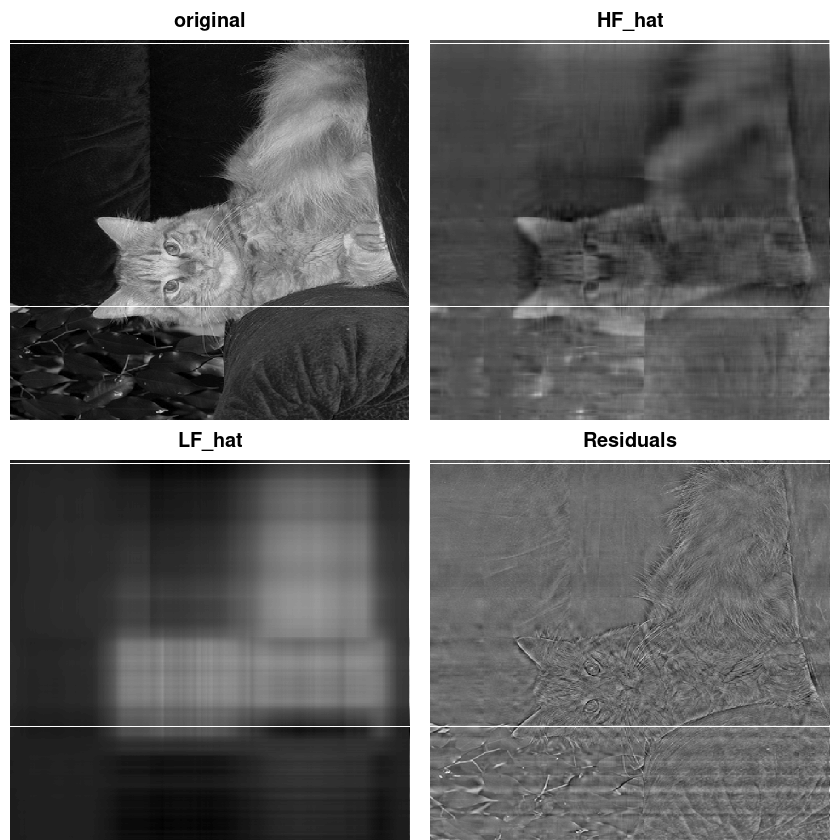

In [10]:
G=t(z-mean(z))%*%(z-mean(z))
outsvd<-svd(G)
plot(outsvd$d[1:20]/sum(outsvd$d))
par(mfcol=c(2,2), mar=c(0,0.5,2,0.5))
image(z, xlab="", ylab="", col=gray(0:100/100), axes=F, main="original")
image(z %*% outsvd$u[,1:2] %*% t(outsvd$u[,1:2]),xlab="",ylab="", col=gray(0:100/100), axes=F, main="LF_hat")
image(z %*% outsvd$u[,3:20] %*% t(outsvd$u[,3:20]),xlab="",ylab="", col=gray(0:100/100), axes=F, main="HF_hat")
image(z - z %*% outsvd$u[,1:20] %*% t(outsvd$u[,1:20]),xlab="",ylab="", col=gray(0:100/100), axes=F, main="Residuals")